<a href="https://colab.research.google.com/github/Sampurn-Anand/Databyte_inductions/blob/main/Inductions_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement 

> ## **Basic Image classifier CNN**



```
- So Neural Nets are your go to approach for solving any problem.
- Create a labelled dataset of Avengers images- Captain America, Iron Man, Black
Widow, Hulk,Thor. (Try scraping images from internet , instead of manually
creating the dataset)
- Train a CNN that is able to classify an unseen image with reasonable accuracy.
- You can use frameworks like PyTorch and Keras to simplify your workflow.
- If your basic model works fine, you can add more classes to it!
Bonus - If possible, deploy your classification model in Web/App. Have an option to ask users
to upload an image and predict that in real time.
You are required to write a medium article or any blog or any article summarizing your
approach, algorithms implemented, tools used, various calculations, observations and
conclusions. (You may not write the readme.txt file)
```

Credits: Stack Overflow, Google

##Step 1 - Data Collection

In this project we need to collect data in form of images. The Images can be 
ontained from manually scrapping single (static and/or dynamic) websites.
But since a large amount of images is needed, so, many websiter will have to be scrapped. Instead of going manually on different websites, one can scrap the Google Images or Bing Images.

There can be many methods for scrapping images. Three of which that are popularly used are as follows :
1. Using the python and web scrapping tools to automate download of a certain type of images from google directly. This method is quite illegal, so, websites and Google itself make sure that these web crawlers don't work. Which is the reason why the codes need to be updated on a regular basis. 
2. By using Chrome browser extensions like fatkun. These extensions are far more stable to use than the previous method. But as per the requirement of the problem statement, in this project we need to scrap images from internet.
3. Using Python tools such as Bing Image Downloader to diretly export required images to a directory.

>In this project, for the sake of convenience, Bing Image Downloader is used.

In [138]:
!pip install bing-image-downloader
from bing_image_downloader import downloader

from google.colab import drive
#drive.mount('/content/drive',force_remount=True)

downloader.download('Captain America Chris Evans', output_dir= './drive/MyDrive/datasets/collection', limit = 400, adult_filter_off = False, force_replace = False, timeout = 6000)
downloader.download('Iron Man Tony Stark',output_dir= './drive/MyDrive/datasets/collection', limit = 1000, adult_filter_off = False, force_replace = False, timeout = 6050)
downloader.download('Black Widow Scarlett Johansson',output_dir= './drive/MyDrive/datasets/collection', limit = 600, adult_filter_off = False, force_replace = False, timeout = 6050)
downloader.download('Hulk Mark Ruffalo',output_dir= './drive/MyDrive/datasets/collection', limit = 600, adult_filter_off = False, force_replace = False, timeout = 6050)
downloader.download('Thor Chris Hemsworth',output_dir= './drive/MyDrive/datasets/collection', limit = 400, adult_filter_off = False, force_replace = False, timeout = 6050)

Streaming output truncated to the last 5000 lines.
[!] Issue getting: https://wallpapersite.com/images/wallpapers/spider-man-360x640-ps4-hd-4k-3125.jpg
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #491 from https://wallpapersite.com/images/wallpapers/iron-man-1080x1920-avengers-infinity-war-4k-12794.jpg
[!] Issue getting: https://wallpapersite.com/images/wallpapers/iron-man-1080x1920-avengers-infinity-war-4k-12794.jpg
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #491 from https://wallpapersite.com/images/wallpapers/revenant-640x1136-doom-horror-310.jpg
[!] Issue getting: https://wallpapersite.com/images/wallpapers/revenant-640x1136-doom-horror-310.jpg
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #491 from https://petmaya.com/wp-content/uploads/2015/05/avengers-girls-20.jpg
[%] File Downloaded !

[%] Downloading Image #492 from https://wallpapersite.com/images/wallpapers/fortnite-1440x900-season-5-2018-4k-8k-15033.jpg
[!] Issue getting: https

In [140]:
!ls "./drive/MyDrive/datasets/collection/Captain America Chris Evans"
!ls "./drive/My Drive/Colab Notebooks/opencv/haarcascades"

Image_100.jpg  Image_174.jpg  Image_247.jpg  Image_31.jpg   Image_393.jpg
Image_101.jpg  Image_175.jpg  Image_248.jpg  Image_320.jpg  Image_394.jpg
Image_102.jpg  Image_176.jpg  Image_249.jpg  Image_321.jpg  Image_395.jpg
Image_103.jpg  Image_177.jpg  Image_24.jpg   Image_322.jpg  Image_396.jpg
Image_104.jpg  Image_178.jpg  Image_250.jpg  Image_323.jpg  Image_397.jpg
Image_105.jpg  Image_179.jpg  Image_251.jpg  Image_324.jpg  Image_398.jpg
Image_106.jpg  Image_17.jpg   Image_252.jpg  Image_325.jpg  Image_399.jpg
Image_107.jpg  Image_180.jpg  Image_253.jpg  Image_326.jpg  Image_39.jpg
Image_108.jpg  Image_181.jpg  Image_254.jpg  Image_327.jpg  Image_3.jpg
Image_109.jpg  Image_182.jpg  Image_255.jpg  Image_328.jpg  Image_400.jpg
Image_10.jpg   Image_183.jpg  Image_256.jpg  Image_329.jpg  Image_40.jpg
Image_110.jpg  Image_184.jpg  Image_257.jpg  Image_32.jpg   Image_41.jpg
Image_111.jpg  Image_185.jpg  Image_258.jpg  Image_330.jpg  Image_42.jpg
Image_112.jpg  Image_186.jpg  Image_259.jpg 

## Step 2 - Preprocessing: Data Cleaning by removing unwanted images

This Step is vey important to perform Image Classification. 
It increases the overall efficiency of the algorithm.

This step is required in this project because after data collection, it was observed that many unimportant images from Comic Books were collected. These types of images will lead to consumtion of more resources of the system. Moreover, the classifier might make mistakes. So, those images should not be used. 

In this project, opencv and a technique called haar cascades are used for Data Cleaning purposes.They will detect if a face and two eyes are clearly visible or not. If they are visible then the image is kept otherwise the image is discarded. Majority of the data cleaning work will be done using python code but there will be some cleaning work that will have to be done manually. 

```
Steps for Data Cleaning

1.   Faces with 2 eyes are extracted from Raw Images using Haar Cascade
2.   Manually photos with two or more faces are discarded. Also the photos which have blurred photos and other

```
**Additionally installed Libraries: Pywavelets, Seaborn and opencv-python**

### Haar Cascade functioning and usage in brief:- 
Every Image has line and edge features. Haar Cascade uses a moving Window of this edge features to detect where are eyes and full face.

For example, to detect the eyes, the area of eyes tends to more darker than the area below. Haar Cascades use this mask to detect the areas.

OpenCV has readymade APIs to detect face, eyes, etc.
17 different xml files for running the APIs are uploaded manually for detecting the various features. 


#### **Resources Used:**

* OpenCV official documentation for codes of face and eye detection.




In [141]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

face_cascade = cv2.CascadeClassifier("./drive/MyDrive/Colab Notebooks/opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./drive/MyDrive/Colab Notebooks/opencv/haarcascades/haarcascade_eye.xml")


In [142]:
!ls "/content/drive/MyDrive/Colab Notebooks/opencv/haarcascades"

haarcascade_eye_tree_eyeglasses.xml
haarcascade_eye.xml
haarcascade_frontalcatface_extended.xml
haarcascade_frontalcatface.xml
haarcascade_frontalface_alt2.xml
haarcascade_frontalface_alt_tree.xml
haarcascade_frontalface_alt.xml
haarcascade_frontalface_default.xml
haarcascade_fullbody.xml
haarcascade_lefteye_2splits.xml
haarcascade_licence_plate_rus_16stages.xml
haarcascade_lowerbody.xml
haarcascade_profileface.xml
haarcascade_righteye_2splits.xml
haarcascade_russian_plate_number.xml
haarcascade_smile.xml
haarcascade_upperbody.xml


array([[ 834,  359,   88,   88],
       [ 779,  661,  131,  131],
       [ 199,  721,  122,  122],
       [ 370,  910,   66,   66],
       [1030, 1050,   49,   49],
       [ 594, 1059,   46,   46],
       [  74, 1004,   80,   80],
       [ 424, 1153,   32,   32]], dtype=int32)

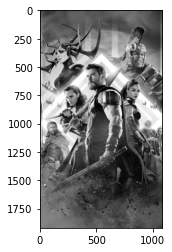

In [143]:
#Testing and intitalizing Haar Cascades 
img = cv2.imread('/content/drive/My Drive/datasets/collection/Thor Chris Hemsworth/Image_8.jpg')
#img.shape
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape
plt.imshow(gray, cmap='gray')

face_cascade = cv2.CascadeClassifier('./drive/MyDrive/Colab Notebooks/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./drive/MyDrive/Colab Notebooks/opencv/haarcascades/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray)
faces


In [144]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [145]:
path_to_data = "/content/drive/My Drive/datasets/collection/"
path_to_cr_data = "/content/drive/My Drive/datasets/cropped/"

In [146]:
!ls "/content/drive/My Drive/datasets/collection/"

'Black Widow Scarlett Johansson'  'Hulk Mark Ruffalo'	 'Thor Chris Hemsworth'
'Captain America Chris Evans'	  'Iron Man Tony Stark'


In [147]:
#Testing 
#img_dirs
#cropped_image_dirs
#!ls "./content/drive/My Drive/datasets/collection/Hulk Mark Ruffalo"

In [148]:
cv2.destroyAllWindows()
"""
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
"""
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

path_to_data = "./drive/My Drive/datasets/collection/"
path_to_cr_data = "./drive/My Drive/datasets/cropped/"

import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder) #Checking whether the code is running successfully or not
                
            cropped_file_name = celebrity_name + str(count) + ".png" #changing file type of every image to png
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Captain America Chris Evans
Generating cropped images in folder:  ./drive/My Drive/datasets/cropped/Captain America Chris Evans
Iron Man Tony Stark
Generating cropped images in folder:  ./drive/My Drive/datasets/cropped/Iron Man Tony Stark
Black Widow Scarlett Johansson
Generating cropped images in folder:  ./drive/My Drive/datasets/cropped/Black Widow Scarlett Johansson
Hulk Mark Ruffalo
Generating cropped images in folder:  ./drive/My Drive/datasets/cropped/Hulk Mark Ruffalo
Thor Chris Hemsworth
Generating cropped images in folder:  ./drive/My Drive/datasets/cropped/Thor Chris Hemsworth


error: ignored

In [ ]:
#Testing Randomly
"""
!ls "/content/drive/My Drive/datasets/cropped/Iron Man Tony Stark"
img = cv2.imread('/content/drive/My Drive/datasets/cropped/Iron Man Tony Stark/Iron Man Tony Stark1.png')
plt.imshow(img)
"""

##Step 3 - Preprocessing: Feature Extraction using Wavelet Transform

Importance of this step is that in Feature Extraction, coloured images cause many errors. The Coloured images can have a variety of shades and variety of colours which makes it a difficult task for the classifier to identify such an image.

To avoid those errors, the images are transformed in black and white colours.
Wavelet transformation allows extraction of the important features from image.
In general, in the wavelet transformed image, the area of eyes will be differentiated from the area of forehead, nose will also be distinct and so on.  

While going through the image processing literature, it was found out that wavelet transforms are often the most effective way of extracting. So, Wavelet transformation is being used in this project.

After inputting the image, it will perform the wavelet transformation on top of it using PYWT (pi wavelet transform library) and it will return your new image which is the wavelet transform. Concepts on signal processing, frequency domain, time domain, Fourier transformation has been used to apply the Wavelet transformation in main Codes. 
**A few of these concepts are explained below:**

```
Any signal, like an audio signal, image can also be considered as a signal. It can be presented in two type of domain. 
So, image can be presented in a spatial domain like space (x and y) or it can be represented as a frequency domain. 
Audio signal can be represented in a time domain or a frequency domain.



Fourier transform will take a complex signal and will return the basic signals which makes that complex signal. 
For Example, let's consider some dish, let's say Dosa. 
If reverse engineering is done on Dosa, the basic ingredients are obtained which are water, rice flour, urad dal and maybe more. 

Similar case is with a complex signal where there are different instruments playing in and there is also noise. 
There are many noise cancellation devices so how do they actually cancel the noise? 
That is something done using Fourier transformation because it can separate out the voice of the vocal cord and the noise. 
It can separate out all these signals into different frequencies and using the frequency filters some frequencies can be suppressed or it can be inter amplified. 
Certain frequencies in certain audio devices, treble or bass can be increased. All of this is possible because of Fourier transformation. 

Wavelet transformation is kind of similar to Fourier transformation which amplifies certain features of the image.
```
For the further steps, input will be a vertically stacked Colour image and its wavelet transformed image.


In [149]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

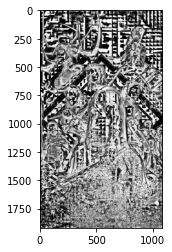

In [150]:

im_har = w2d(img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [151]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Black Widow Scarlett Johansson': ['./drive/My Drive/datasets/cropped/Black Widow Scarlett Johansson/Black Widow Scarlett Johansson1.png',
  './drive/My Drive/datasets/cropped/Black Widow Scarlett Johansson/Black Widow Scarlett Johansson2.png',
  './drive/My Drive/datasets/cropped/Black Widow Scarlett Johansson/Black Widow Scarlett Johansson3.png',
  './drive/My Drive/datasets/cropped/Black Widow Scarlett Johansson/Black Widow Scarlett Johansson4.png',
  './drive/My Drive/datasets/cropped/Black Widow Scarlett Johansson/Black Widow Scarlett Johansson5.png',
  './drive/My Drive/datasets/cropped/Black Widow Scarlett Johansson/Black Widow Scarlett Johansson6.png',
  './drive/My Drive/datasets/cropped/Black Widow Scarlett Johansson/Black Widow Scarlett Johansson7.png',
  './drive/My Drive/datasets/cropped/Black Widow Scarlett Johansson/Black Widow Scarlett Johansson8.png',
  './drive/My Drive/datasets/cropped/Black Widow Scarlett Johansson/Black Widow Scarlett Johansson9.png',
  './drive/M

In [152]:
#assigning a number for each character
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Black Widow Scarlett Johansson': 2,
 'Captain America Chris Evans': 0,
 'Hulk Mark Ruffalo': 3,
 'Iron Man Tony Stark': 1,
 'Thor Chris Hemsworth': 4}

In [153]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
          continue
        scalled_raw_img = cv2.resize(img, (32, 32)) #resizing using openCV as images maybe of different sizes
        img_har = w2d(img,'db1',5) #getting the wavelet transformed image
        scalled_img_har = cv2.resize(img_har, (32, 32)) #resizing wavelet transformed image
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1))) #vertically stacking both the images
        X.append(combined_img)
        y.append(class_dict[celebrity_name])
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape


(524, 4096)

#Step 4 - Model Training: Using SVM with heuristic finetuning

SVMs peroform better than the other models for image classification. 
> In this Project, at first SVM is used to train the main model. 

> Then other models are tested using **GridSearch** to decide which model is the best fit for the project. 

The GridSearch CV is used for Hypertuning parameters. It helps in deciding which model is performing the best.

In our project, we are defining the candidate models as follows for comparisions:
1. SVM with parameters as - Values of C are 1,10,100,1000 and Kernel Values are rbf and linear.
2. Random Forest with parameters as - Number of estimators (or Decision Trees) as 1,5,10.
3. Logistic Regression with parameters as - Values of C are 1,5,10.

> Finally the best model is stored in the "Trained Model" and the class dictionary is also saved. 

In [154]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Pipeline is created to scale the Data.  
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.9770992366412213

In [156]:
#Checking Size of Test Sample
len(X_test)

131

In [157]:
print(classification_report(y_test, pipe.predict(X_test)))


              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.92      0.92      0.92        12
           2       1.00      1.00      1.00        77
           3       1.00      1.00      1.00        16
           4       0.80      0.89      0.84         9

    accuracy                           0.98       131
   macro avg       0.94      0.95      0.95       131
weighted avg       0.98      0.98      0.98       131



In [158]:
# Testing other models using GridSearch
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [159]:
# Three models - SVM, Random Forest and Logistic Regression are being compared.

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [160]:
#Cross Validation
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False) 
    # cv=5 => There will be 5 folds of testing the model and 
    # then will avereage out the scores 
    clf.fit(X_train, y_train)
    # Scores are appended and a data frame is created from it
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.979682,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.949172,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.961928,{'logisticregression__C': 5}


##Now, we will test the models on test data.

In [161]:
best_estimators

{'logistic_regression': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('logisticregression',
                  LogisticRegression(C=5, class_weight=None, dual=False,
                                     fit_intercept=True, intercept_scaling=1,
                                     l1_ratio=None, max_iter=100,
                                     multi_class='auto', n_jobs=None,
                                     penalty='l2', random_state=None,
                                     solver='liblinear', tol=0.0001, verbose=0,
                                     warm_start=False))],
          verbose=False), 'random_forest': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('randomforestclassifier',
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
            

In [162]:
best_estimators['svm'].score(X_test,y_test)


0.9770992366412213

In [163]:
best_estimators['random_forest'].score(X_test,y_test)


0.9389312977099237

In [164]:
best_estimators['logistic_regression'].score(X_test,y_test)


0.9847328244274809

###Now as seen by the score on test data, Logistic Regression is performing better than the other two models. But, SVM is performing better on the Training data. Also, SVM's scores on test data is close-by.
---
---
### So SVM, will be used in this project.



In [166]:
best_clf = best_estimators['logistic_regression']


In [167]:
#Constructing the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[16,  1,  0,  0,  0],
       [ 0, 11,  0,  0,  1],
       [ 0,  0, 77,  0,  0],
       [ 0,  0,  0, 16,  0],
       [ 0,  0,  0,  0,  9]])

Text(69.0, 0.5, 'Truth')

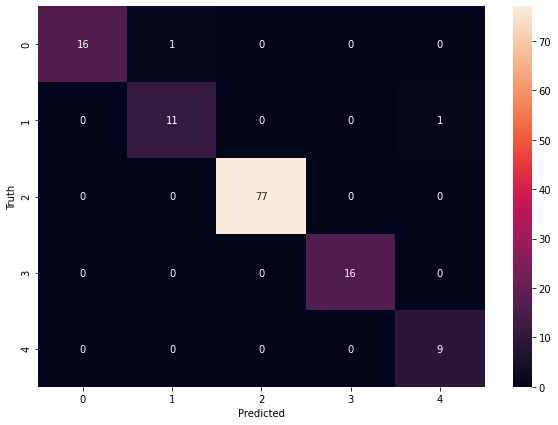

In [168]:
#Plotting the confusion matrix to Vizualise
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [169]:
#Refering the main dictionary
class_dict


{'Black Widow Scarlett Johansson': 2,
 'Captain America Chris Evans': 0,
 'Hulk Mark Ruffalo': 3,
 'Iron Man Tony Stark': 1,
 'Thor Chris Hemsworth': 4}

In [170]:
#Saving the Model to make the Web App
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [173]:
#Saving the Class dictionary
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))